# EDA(Exploratory Data Analysis)

In [1]:
import sys
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Fortyfour\\Desktop\\graduation_design\\Scripts\\Data'

In [2]:
# To import the custom module from a specific path
sys.path.insert(0, os.path.join(current_dir, '../'))

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from ydata_profiling import ProfileReport
from Utools.ML_figures.figures import element_prevalence
%matplotlib inline
%config InlineBackend.figure_format='retina'

## MP DATA

In [4]:
# read data from mp_raw_data.csv
raw_df = pd.read_csv(os.path.join(current_dir, '../Data/mp_raw_data.csv'))
raw_df.head()

,material_id,formula_pretty,composition,nsites,crystal_system,space_group,point_group,volume,density,density_atomic,formation_energy_per_atom,energy_above_hull,is_gap_direct,band_gap
0,mp-11107,Ac2O3,Ac2 O3,5,Trigonal,164,-3m,91.511224,9.109130,18.302245,-3.737668,0.0000,False,3.5226
1,mp-32800,Ac2S3,Ac16 S24,40,Tetragonal,122,-42m,1118.407852,6.535149,27.960196,-2.492486,0.0000,False,2.2962
2,mp-977351,Ac2S3,Ac4 S6,10,Trigonal,167,-3m,328.464893,5.562971,32.846489,-2.439787,0.0527,False,3.0275
3,mp-867311,AcAgTe2,Ac1 Ag1 Te2,4,Cubic,225,m-3m,122.518406,7.997421,30.629602,-0.996232,0.0000,False,0.0794
4,mp-1183115,AcAlO3,Ac1 Al1 O3,5,Cubic,221,m-3m,57.451413,8.728230,11.490283,-3.690019,0.0000,True,4.1024


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58919 entries, 0 to 58918
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                58919 non-null  object 
 1   formula_pretty             58918 non-null  object 
 2   composition                58919 non-null  object 
 3   nsites                     58919 non-null  int64  
 4   crystal_system             58919 non-null  object 
 5   space_group                58919 non-null  int64  
 6   point_group                58919 non-null  object 
 7   volume                     58919 non-null  float64
 8   density                    58919 non-null  float64
 9   density_atomic             58919 non-null  float64
 10  formation_energy_per_atom  58919 non-null  float64
 11  energy_above_hull          58919 non-null  float64
 12  is_gap_direct              58919 non-null  bool   
 13  band_gap                   58919 non-null  flo

In [6]:
raw_df.isna().any()

material_id                  False
formula_pretty                True
composition                  False
nsites                       False
crystal_system               False
space_group                  False
point_group                  False
volume                       False
density                      False
density_atomic               False
formation_energy_per_atom    False
energy_above_hull            False
is_gap_direct                False
band_gap                     False
dtype: bool

In [7]:
# Check the row that contains null.
raw_df[raw_df.isna().any(axis=1)]

,material_id,formula_pretty,composition,nsites,crystal_system,space_group,point_group,volume,density,density_atomic,formation_energy_per_atom,energy_above_hull,is_gap_direct,band_gap
42321,mp-1179882,NaN,Na4 N4,8,Orthorhombic,70,mmm,111.868512,2.196653,13.983564,0.008433,0.071563,False,0.1826


In [8]:
# The formula_pretty is 'Nan', but the formula is not null.
raw_df.replace(np.nan, 'NaN', inplace=True)

In [9]:
# check again
raw_df.isna().any()

material_id                  False
formula_pretty               False
composition                  False
nsites                       False
crystal_system               False
space_group                  False
point_group                  False
volume                       False
density                      False
density_atomic               False
formation_energy_per_atom    False
energy_above_hull            False
is_gap_direct                False
band_gap                     False
dtype: bool

In [10]:
raw_df.describe()

,nsites,space_group,volume,density,density_atomic,formation_energy_per_atom,energy_above_hull,band_gap
count,58919.000000,58919.000000,58919.000000,58919.000000,58919.000000,58919.000000,58919.000000,58919.000000
mean,43.738896,58.239770,667.138525,4.207107,16.671160,-2.120857,0.028661,2.192138
std,39.626923,70.120905,629.103298,1.631268,8.942816,0.859573,0.030726,1.478887
min,1.000000,1.000000,11.918569,0.063552,5.959285,-4.489463,0.000000,0.000100
25%,18.000000,6.000000,277.002856,3.034863,11.775380,-2.726168,0.000000,0.953250
50%,32.000000,15.000000,469.888326,3.871178,13.811400,-2.281422,0.017173,2.044000
75%,56.000000,96.000000,840.137755,5.070193,18.209425,-1.566399,0.052186,3.238200
max,444.000000,230.000000,7131.810149,16.321559,741.734700,0.093006,0.099998,5.998400


- We can see that the minimum of band gap is 0.0001eV and the maximum is 5.998eV.

In [11]:
# profile = ProfileReport(raw_df.copy(), title='Pandas Profiling Report of raw dataset', html={'style':{'full_width':True}})
# profile.to_widgets()

In [12]:
# Check for and remove duplicates
data_df = raw_df.drop_duplicates()

print(f'DataFrame shape after dropping duplicates: {data_df.shape}')

DataFrame shape after dropping duplicates: (58919, 14)


In [13]:
# Check the type of compound
composition_type = data_df['composition'].unique()
composition_type
display(len(composition_type))

46071

In [14]:
os.getcwd()

'c:\\Users\\Fortyfour\\Desktop\\graduation_design\\Scripts\\Data'

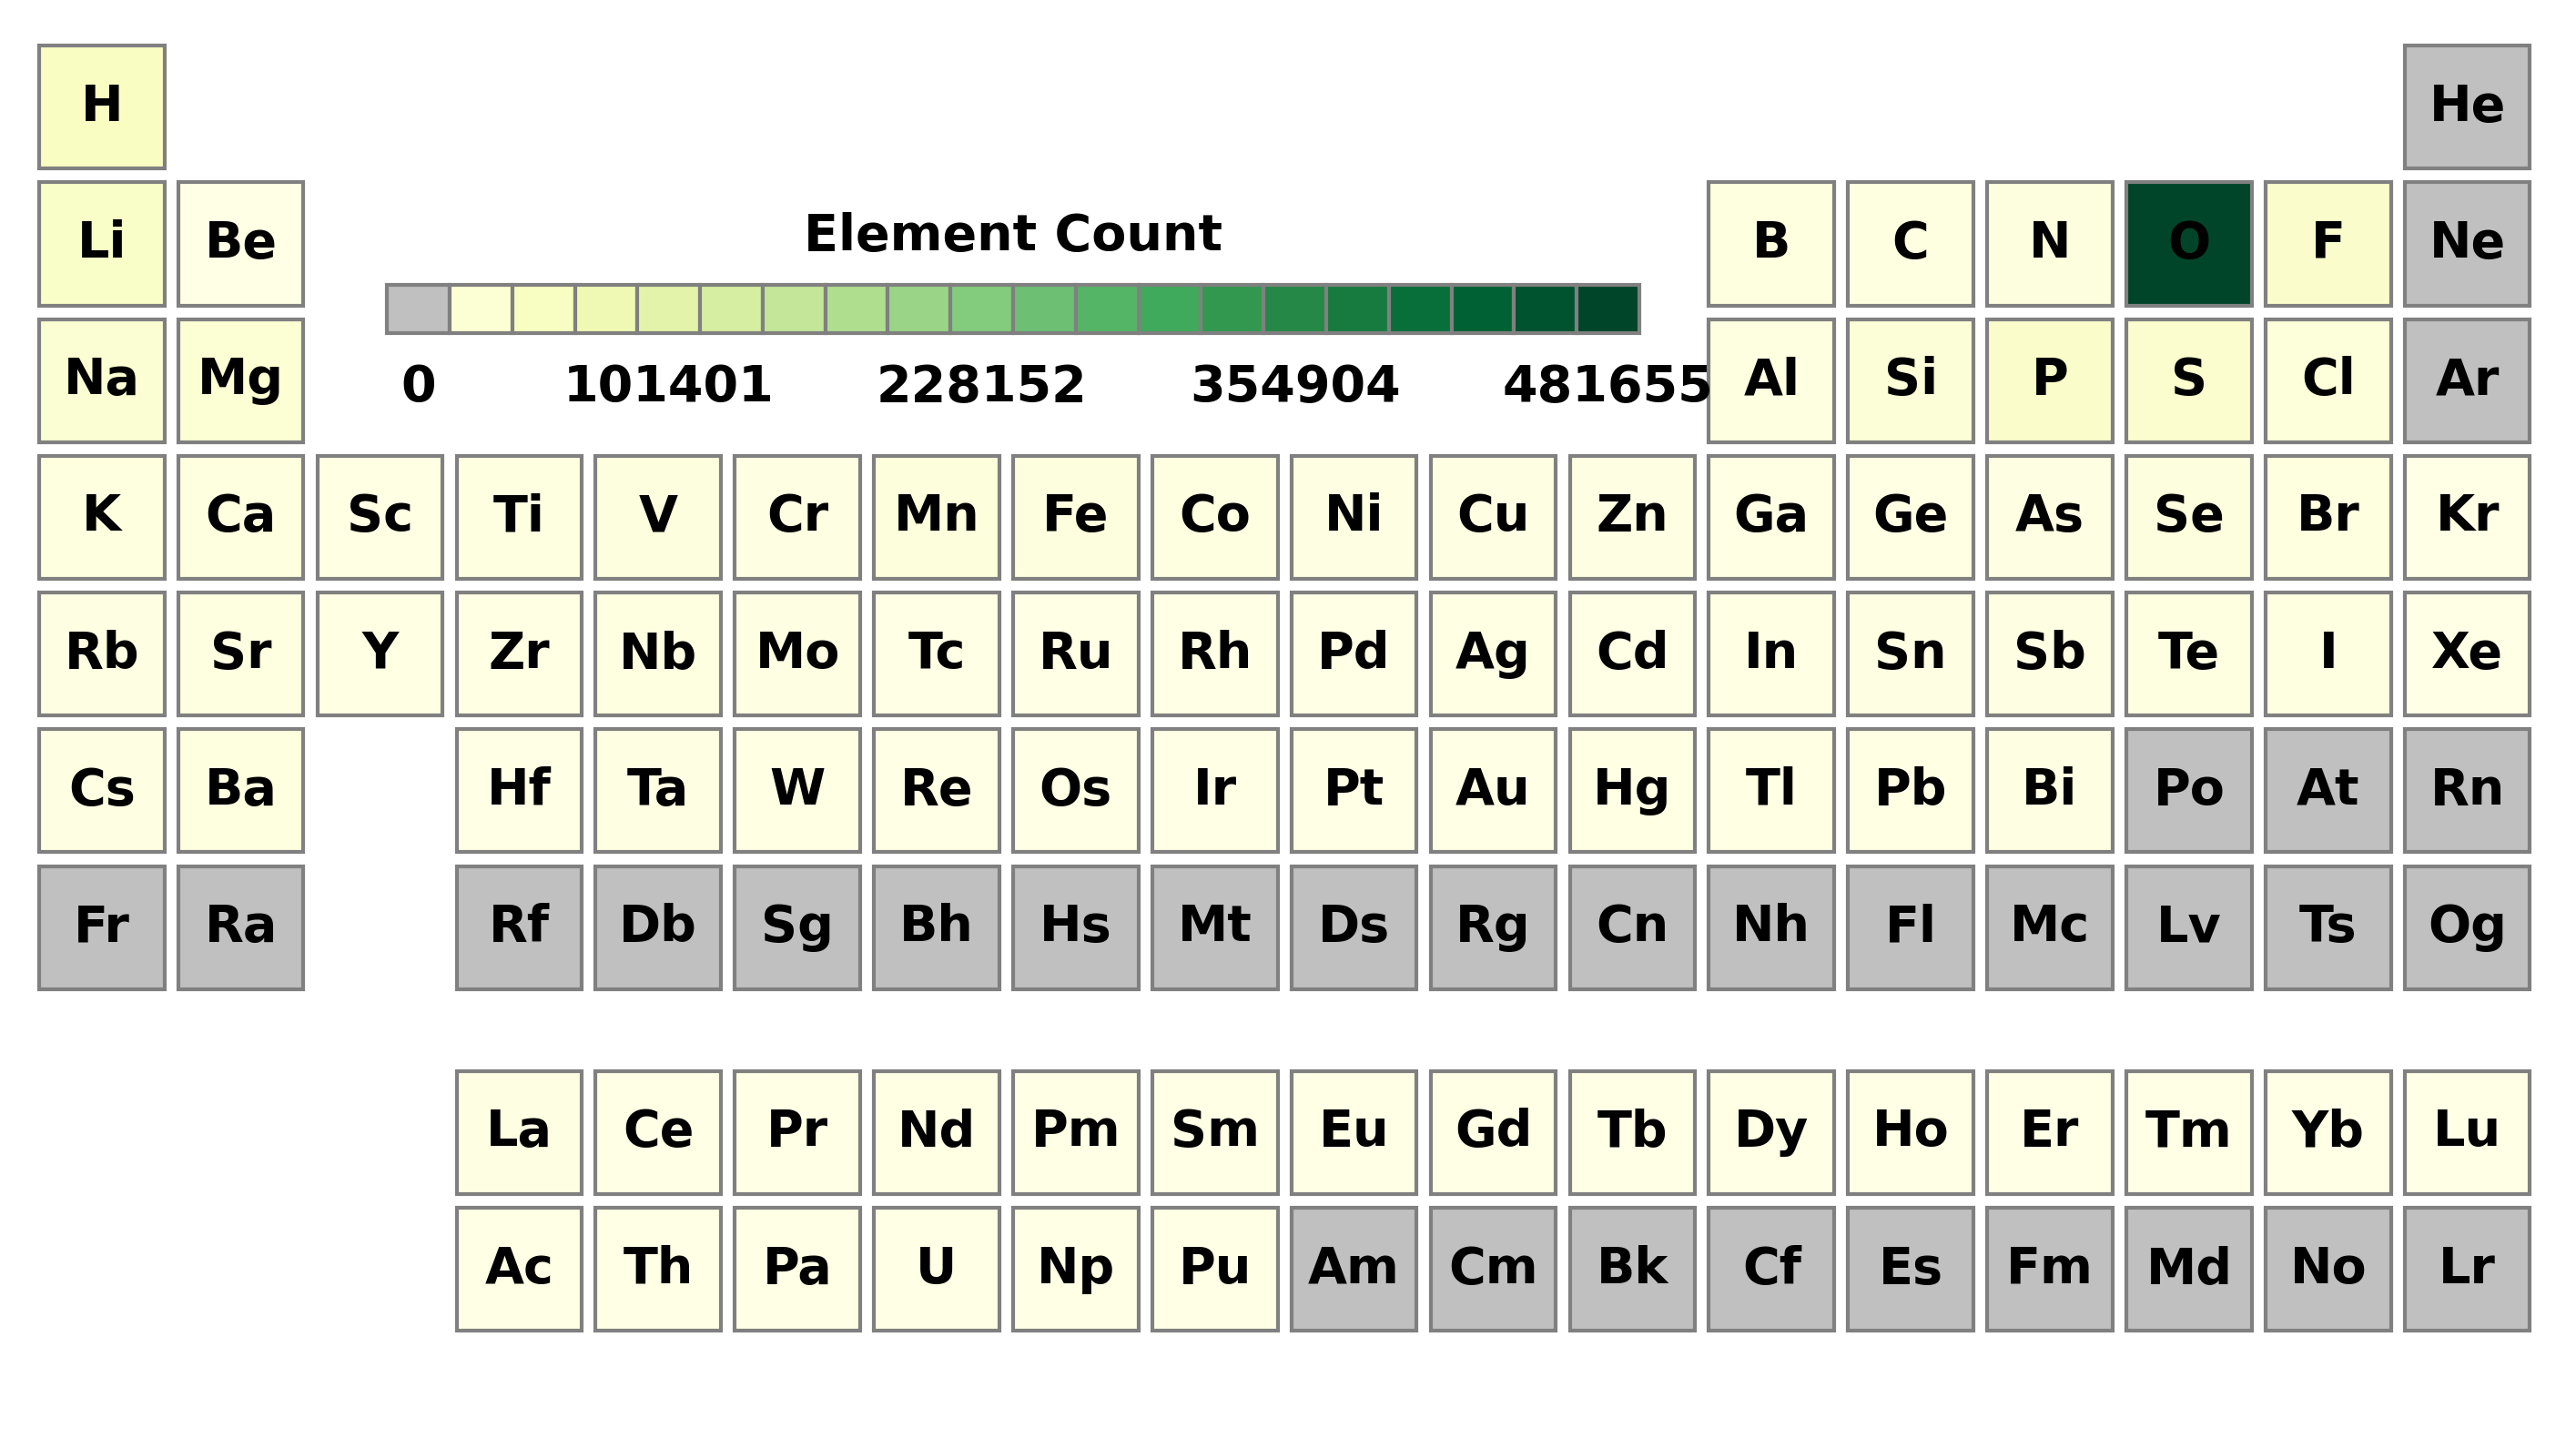

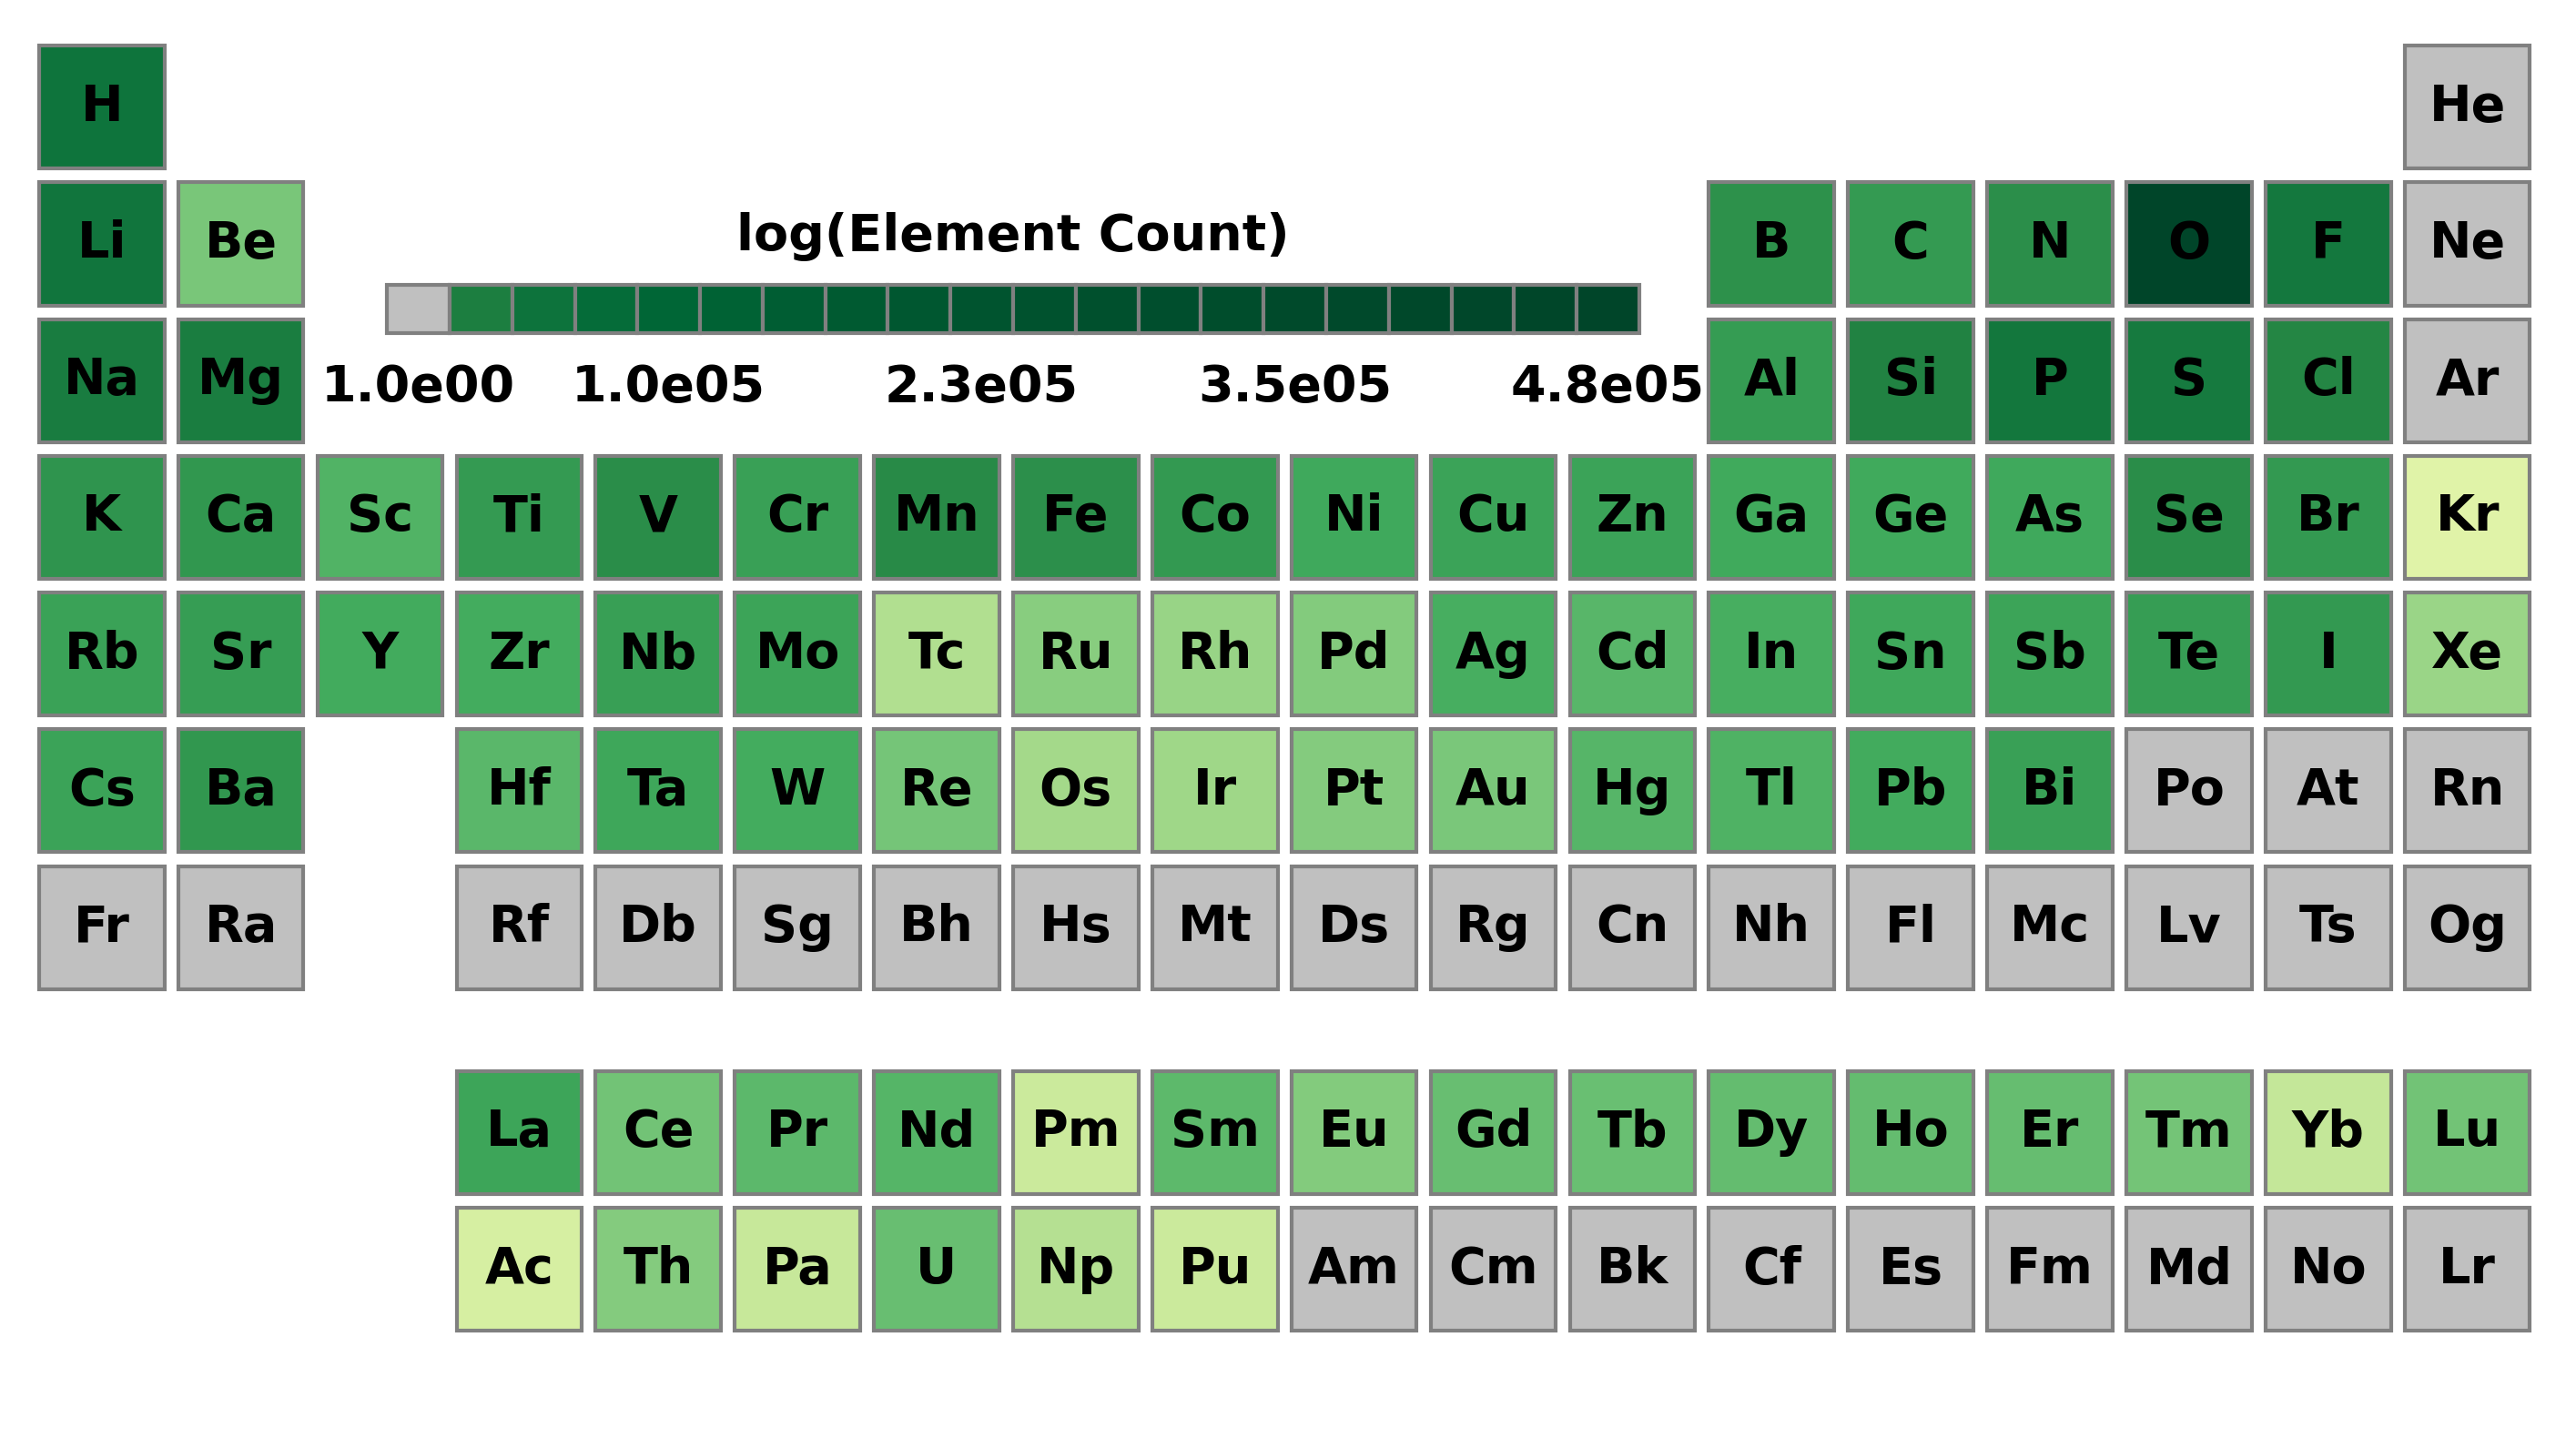

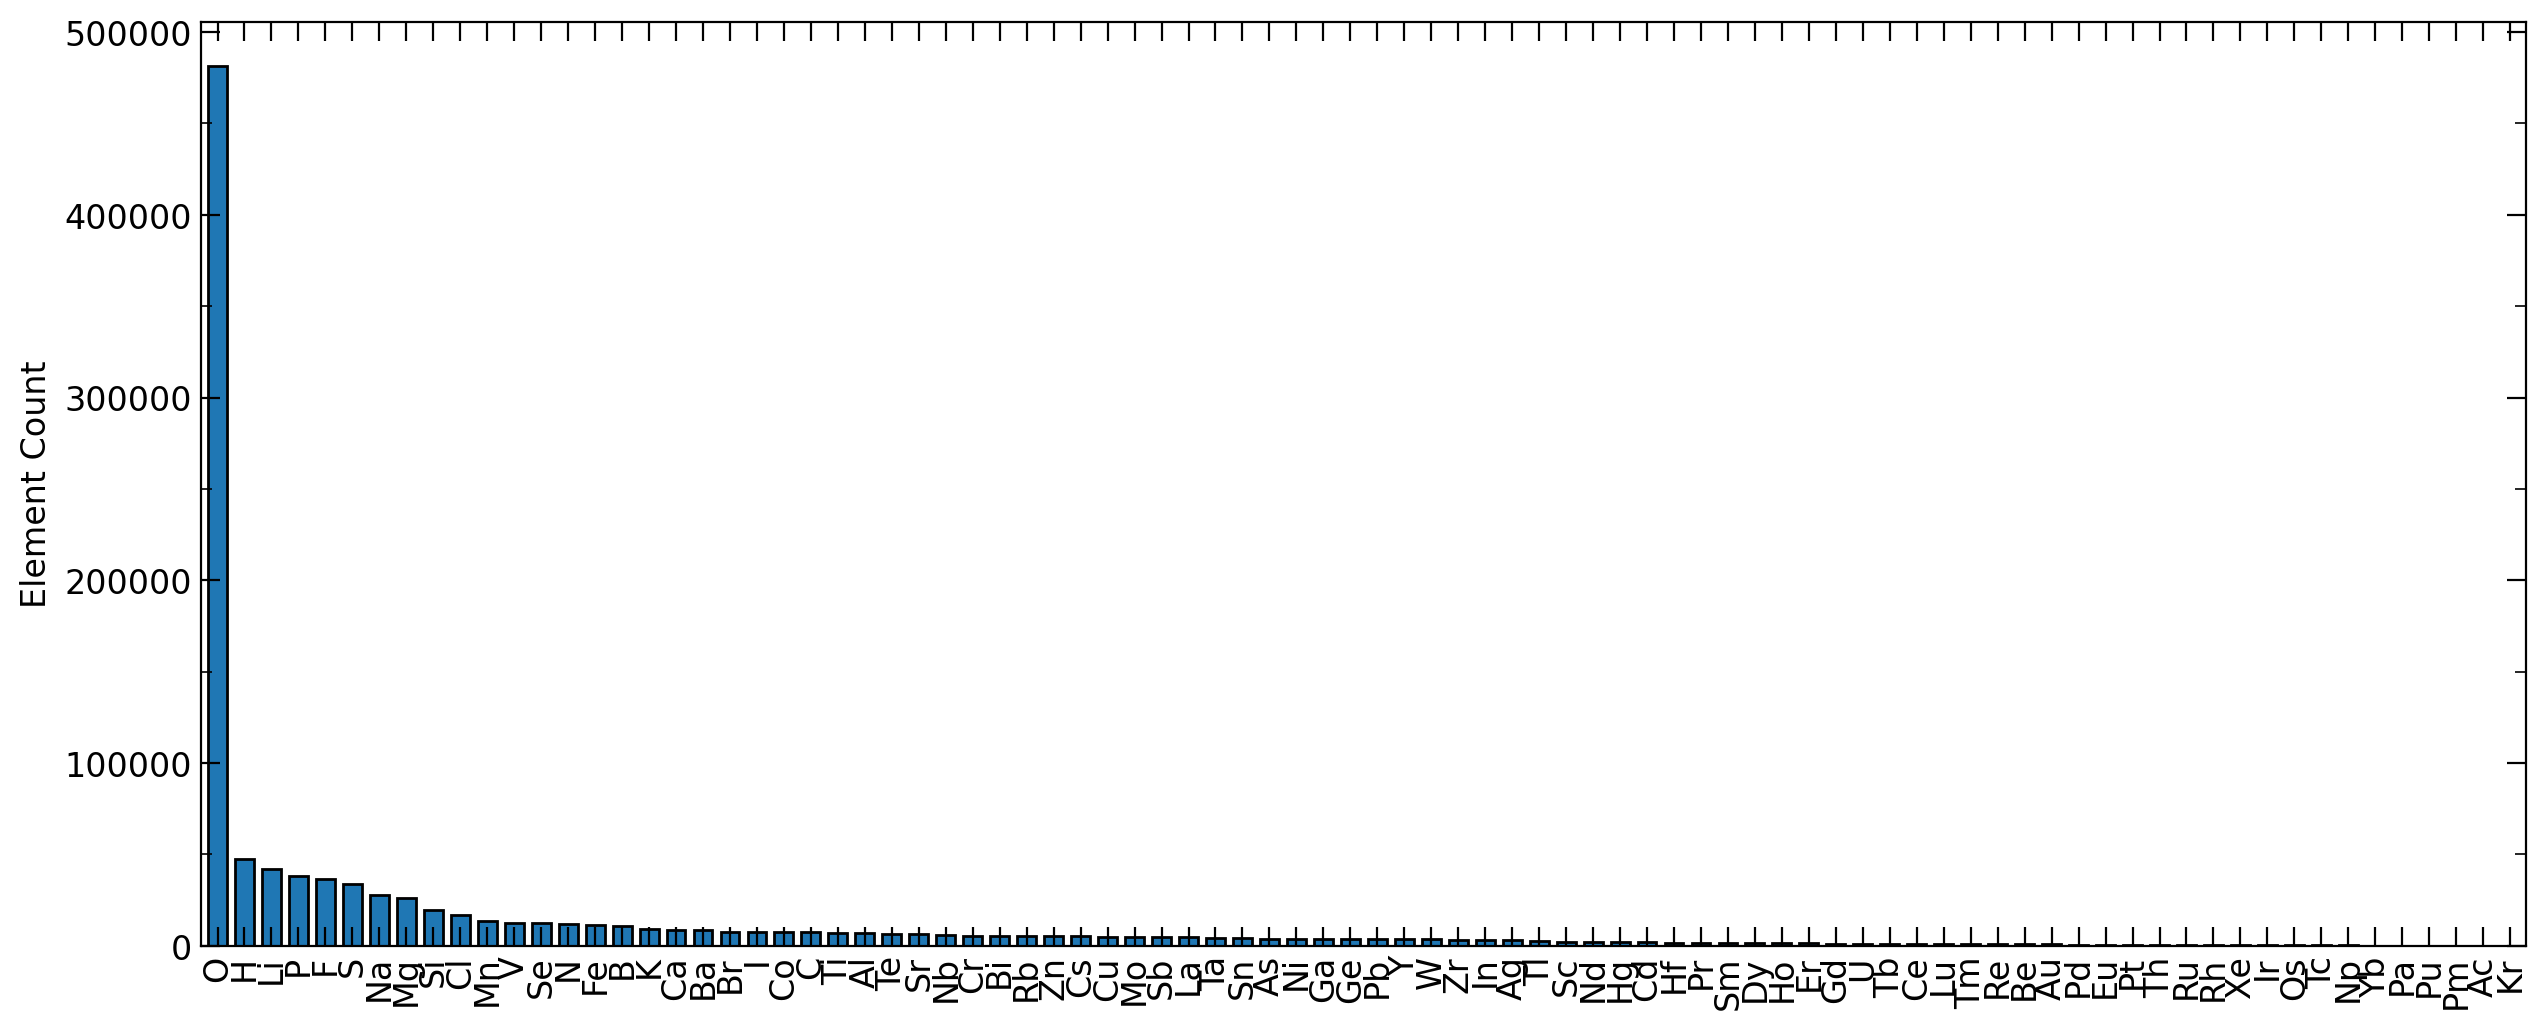

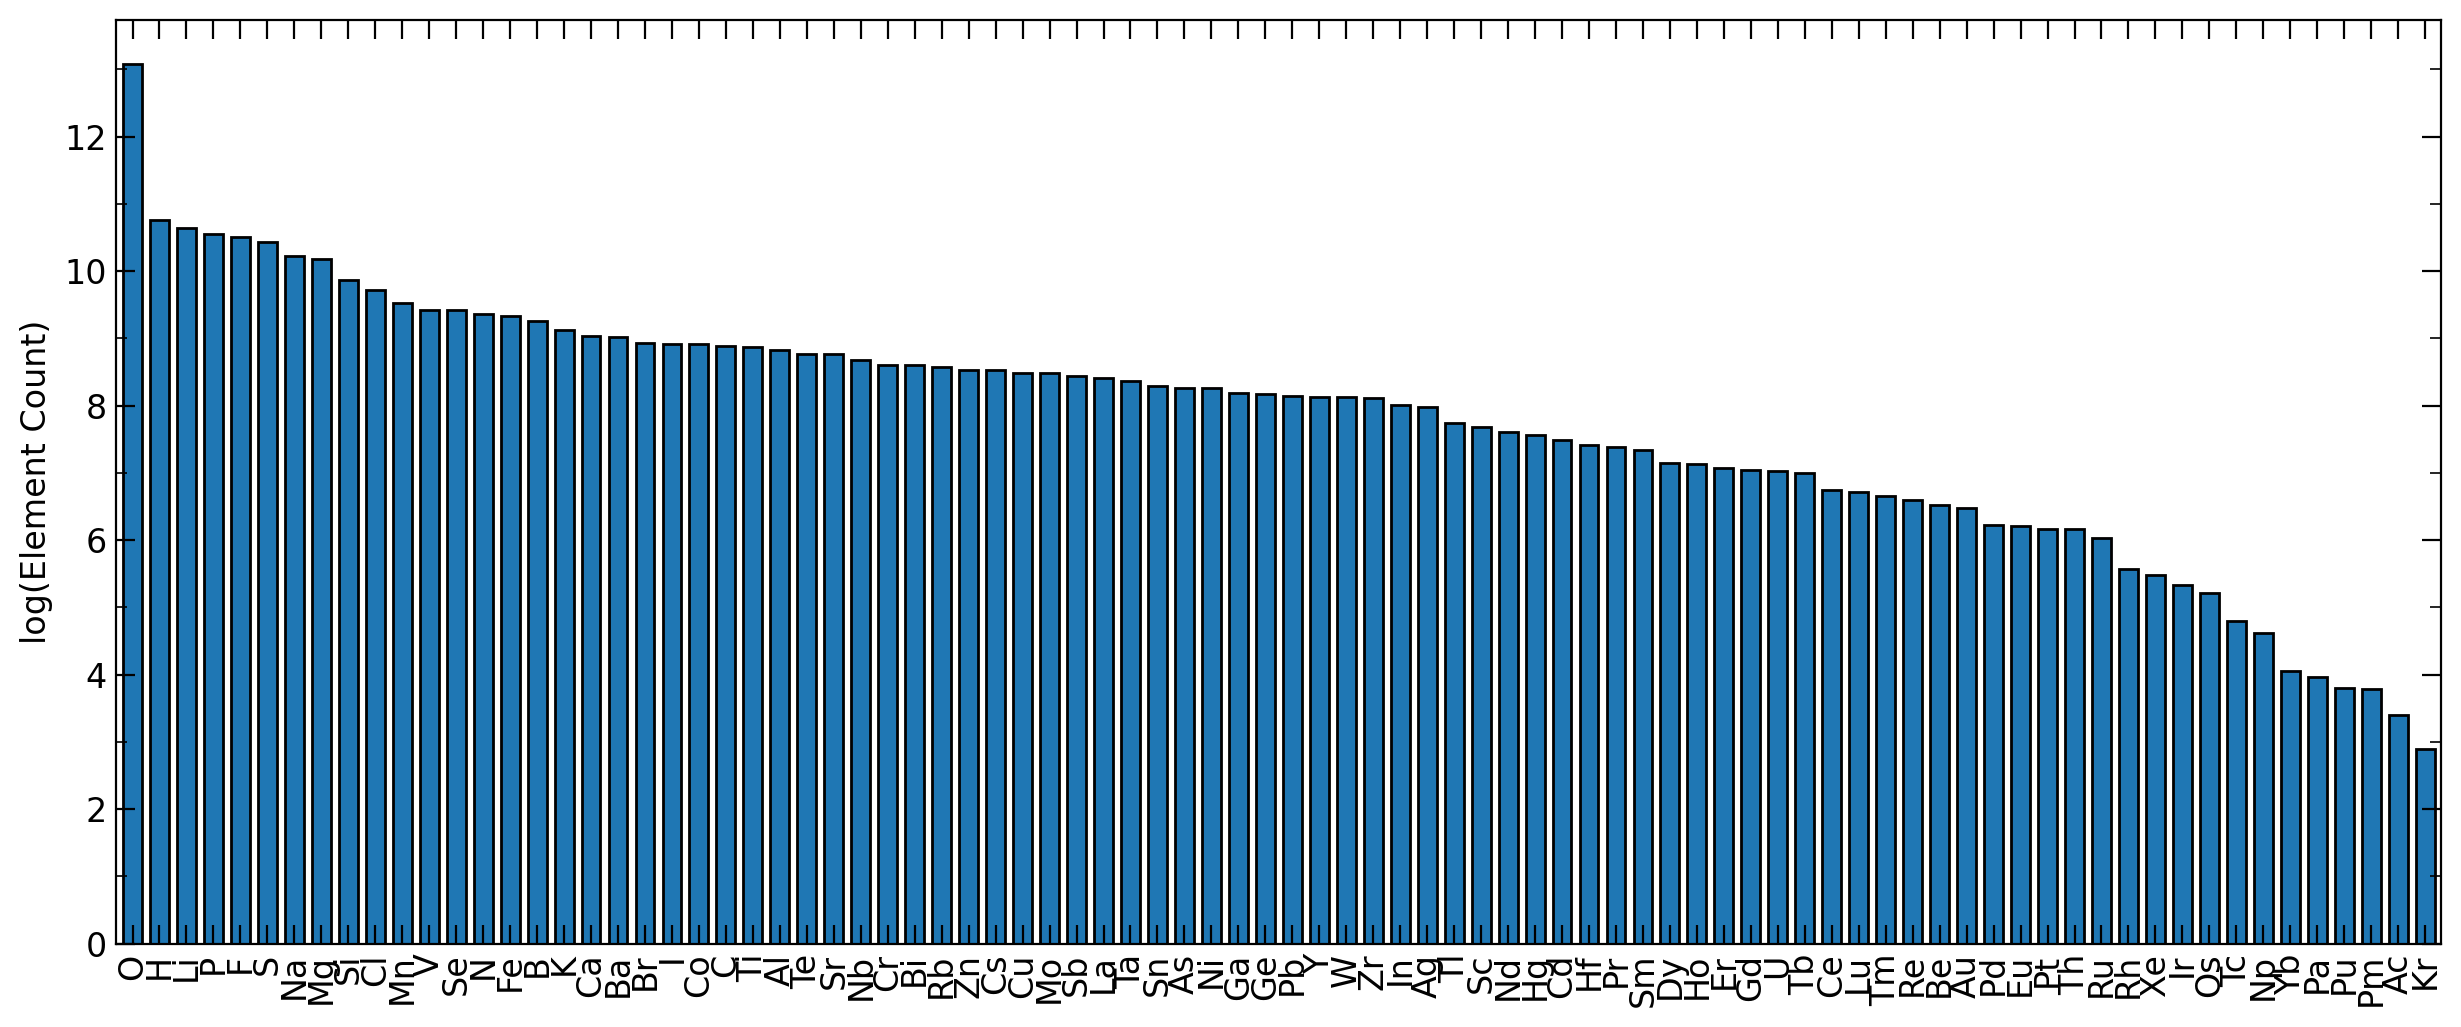

In [16]:
# Visualizing elemental prevalence in the dataset

current_dir = os.getcwd()
os.chdir('../Utools')  # Change to where ML_figures is a direct subdirectory

formula = data_df.iloc[:, 1]

save_dir = os.path.join(current_dir, '../Data/figures/element_prevalence/mp')
element_prevalence(formula,
                   name='element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence_ptable',
                   save_dir=save_dir,
                   log_scale=True)

plt.rcParams.update({'font.size': 12})
element_prevalence(formula,
                   name='element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=False)
element_prevalence(formula,
                   name='log_element_prevalence',
                   save_dir=save_dir,
                   ptable_fig=False,
                   log_scale=True)

os.chdir(current_dir)  # Return to previous directory

### Data distribution

In [17]:
# Draw a violin plot of the distribution of the bandgap with respect to the crystal system. 
# 下面的实现会爆内存
# import plotly.express as px
# import plotly.graph_objects as go

# fig = px.violin(data_df, y="band_gap", x="crystal_system", box=True, points="all", hover_data=data_df.columns)
# fig.update_traces(orientation='h')
# fig.update_layout(title_text="Bandgap distribution by crystal system", title_x=0.5)
# fig.show()

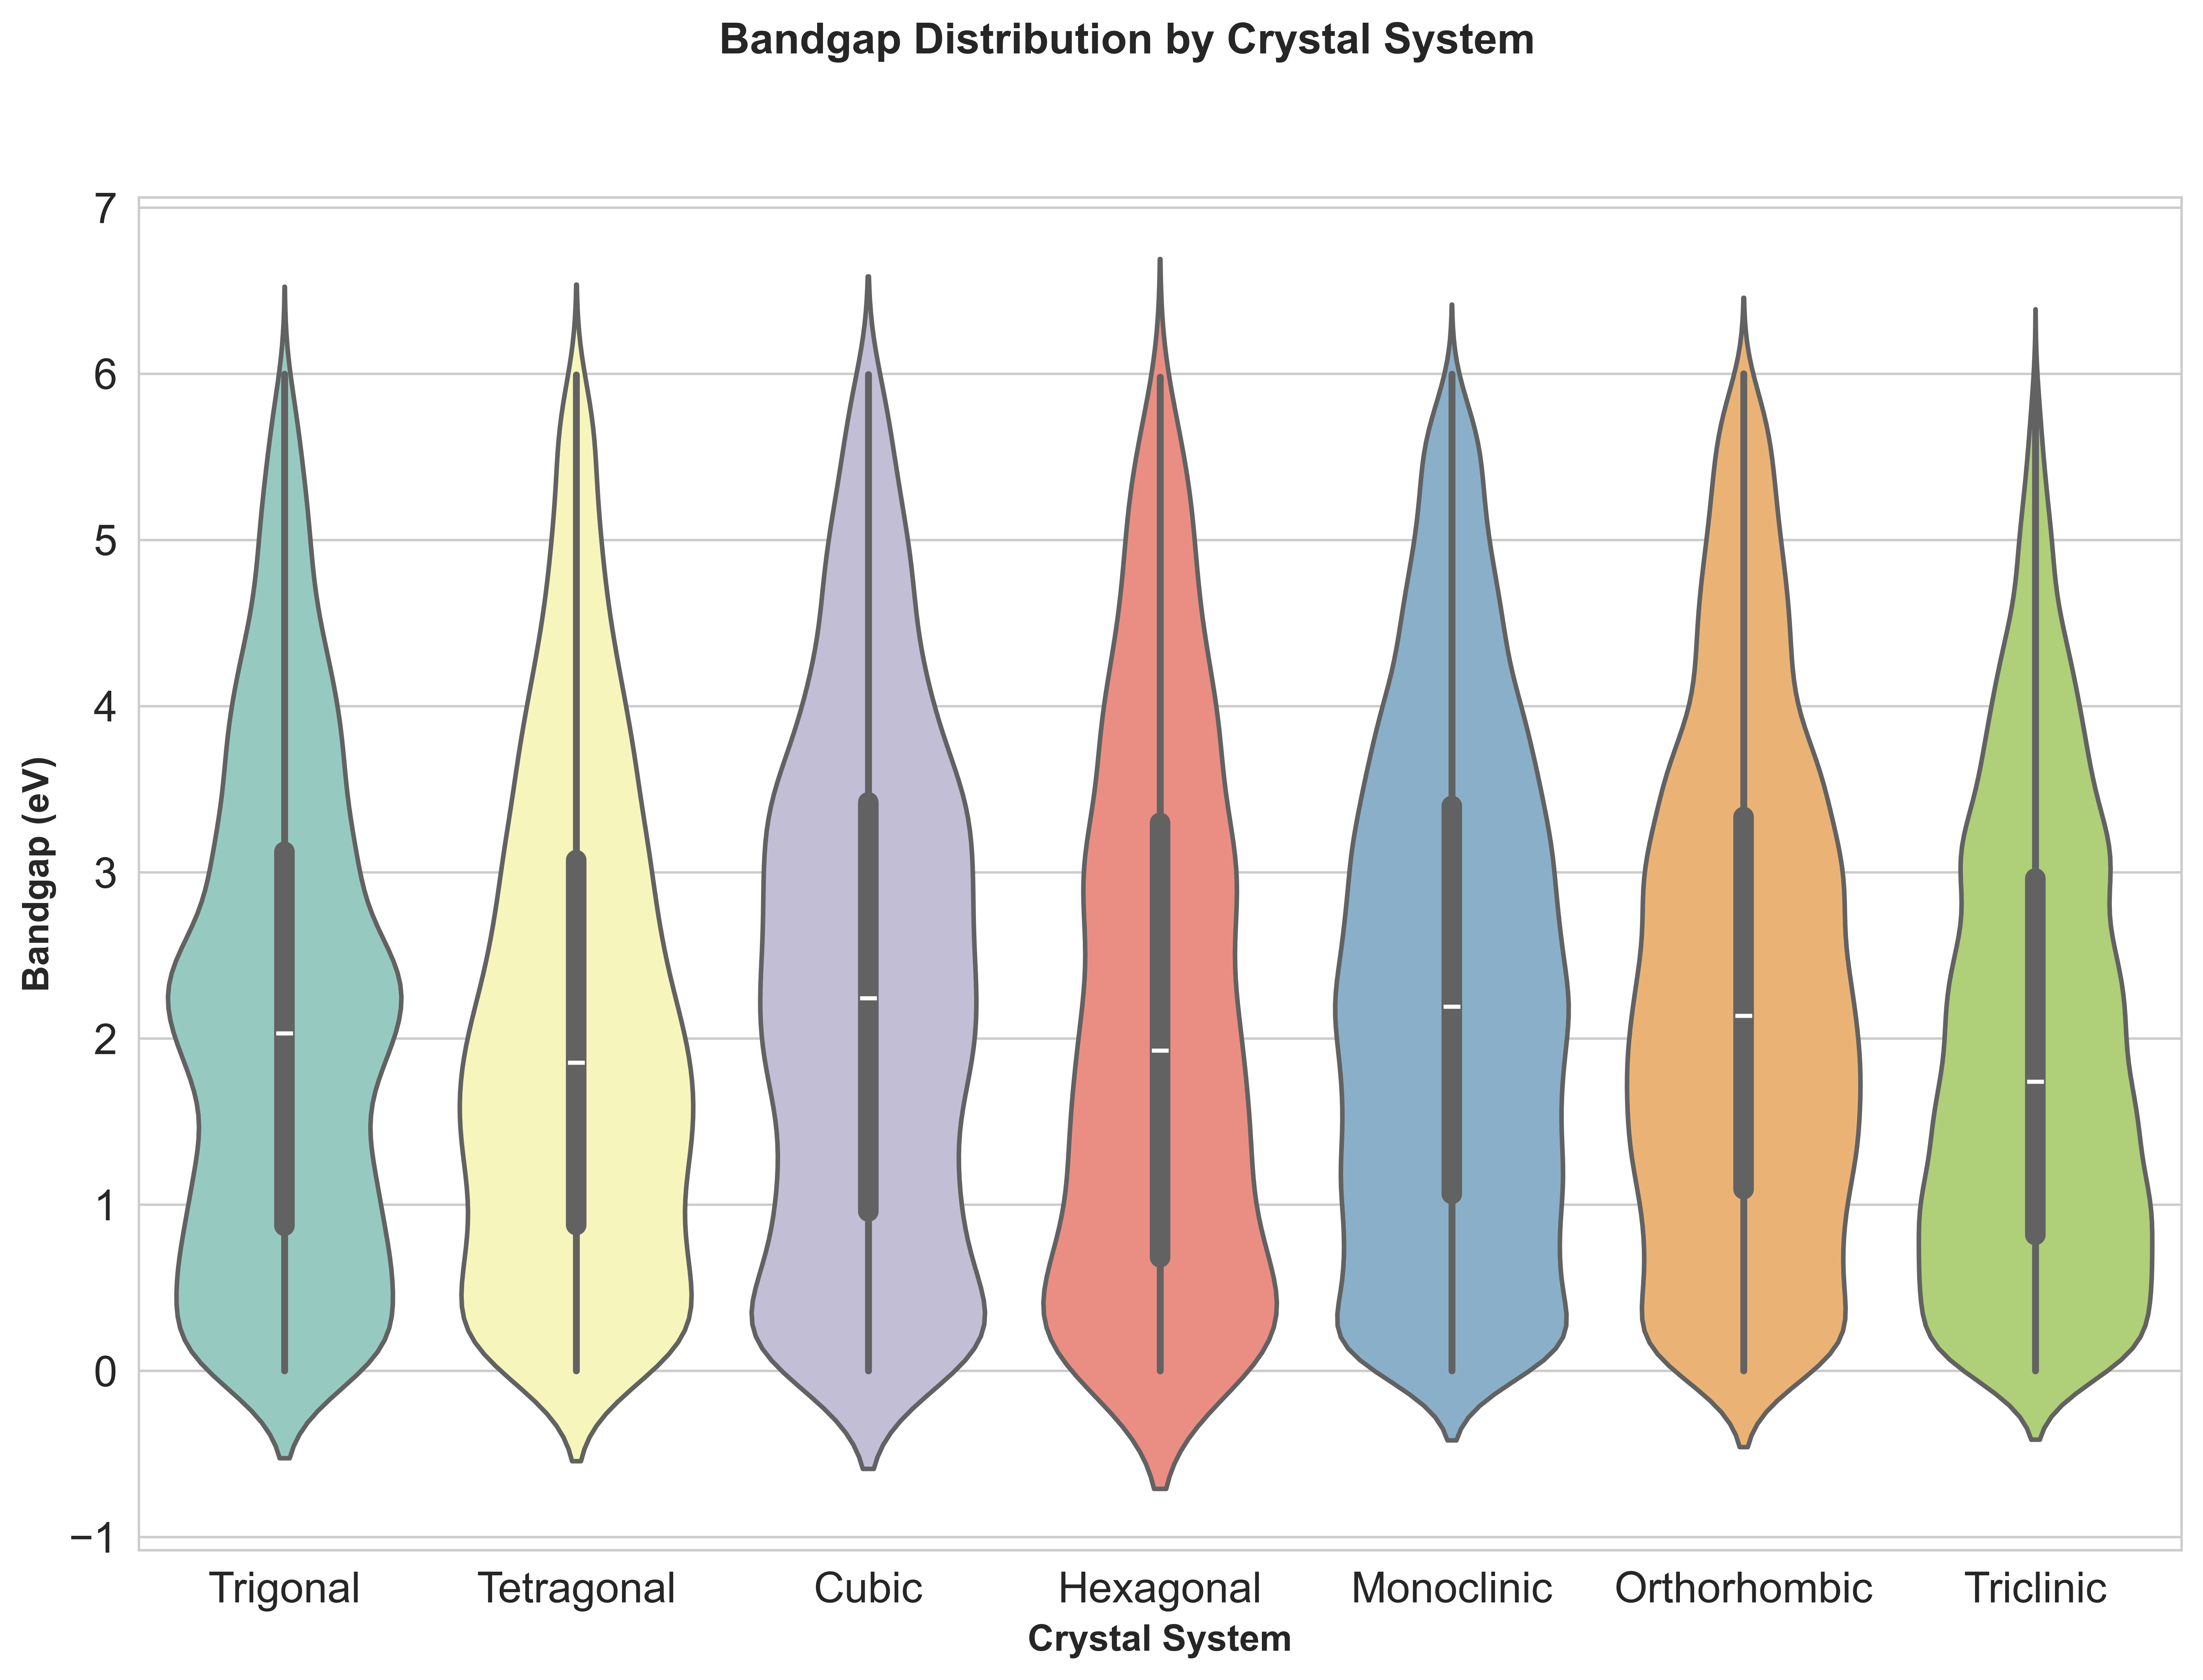

In [15]:
# Draw a violin plot of the distribution of the bandgap with respect to the crystal system. 
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8), dpi=300)

# Set the color palette
ax = sns.violinplot(
    x="crystal_system",
    y="band_gap",
    data=data_df,
    hue="crystal_system",
    palette="Set3",  # Set3, RdBu
    linewidth=1.5,    
    density_norm="count"     
)

plt.suptitle("Bandgap Distribution by Crystal System", fontsize=14, weight="bold")
plt.xlabel("Crystal System", fontsize=12, weight="bold")
plt.ylabel("Bandgap (eV)", fontsize=12, weight="bold")
# Save the figure
# Create the directory if it doesn't exist
save_dir = os.path.join(current_dir, 'figures', 'data_distribution', 'mp')
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'bandgap_crystal_system.png'), dpi=300)
plt.show()

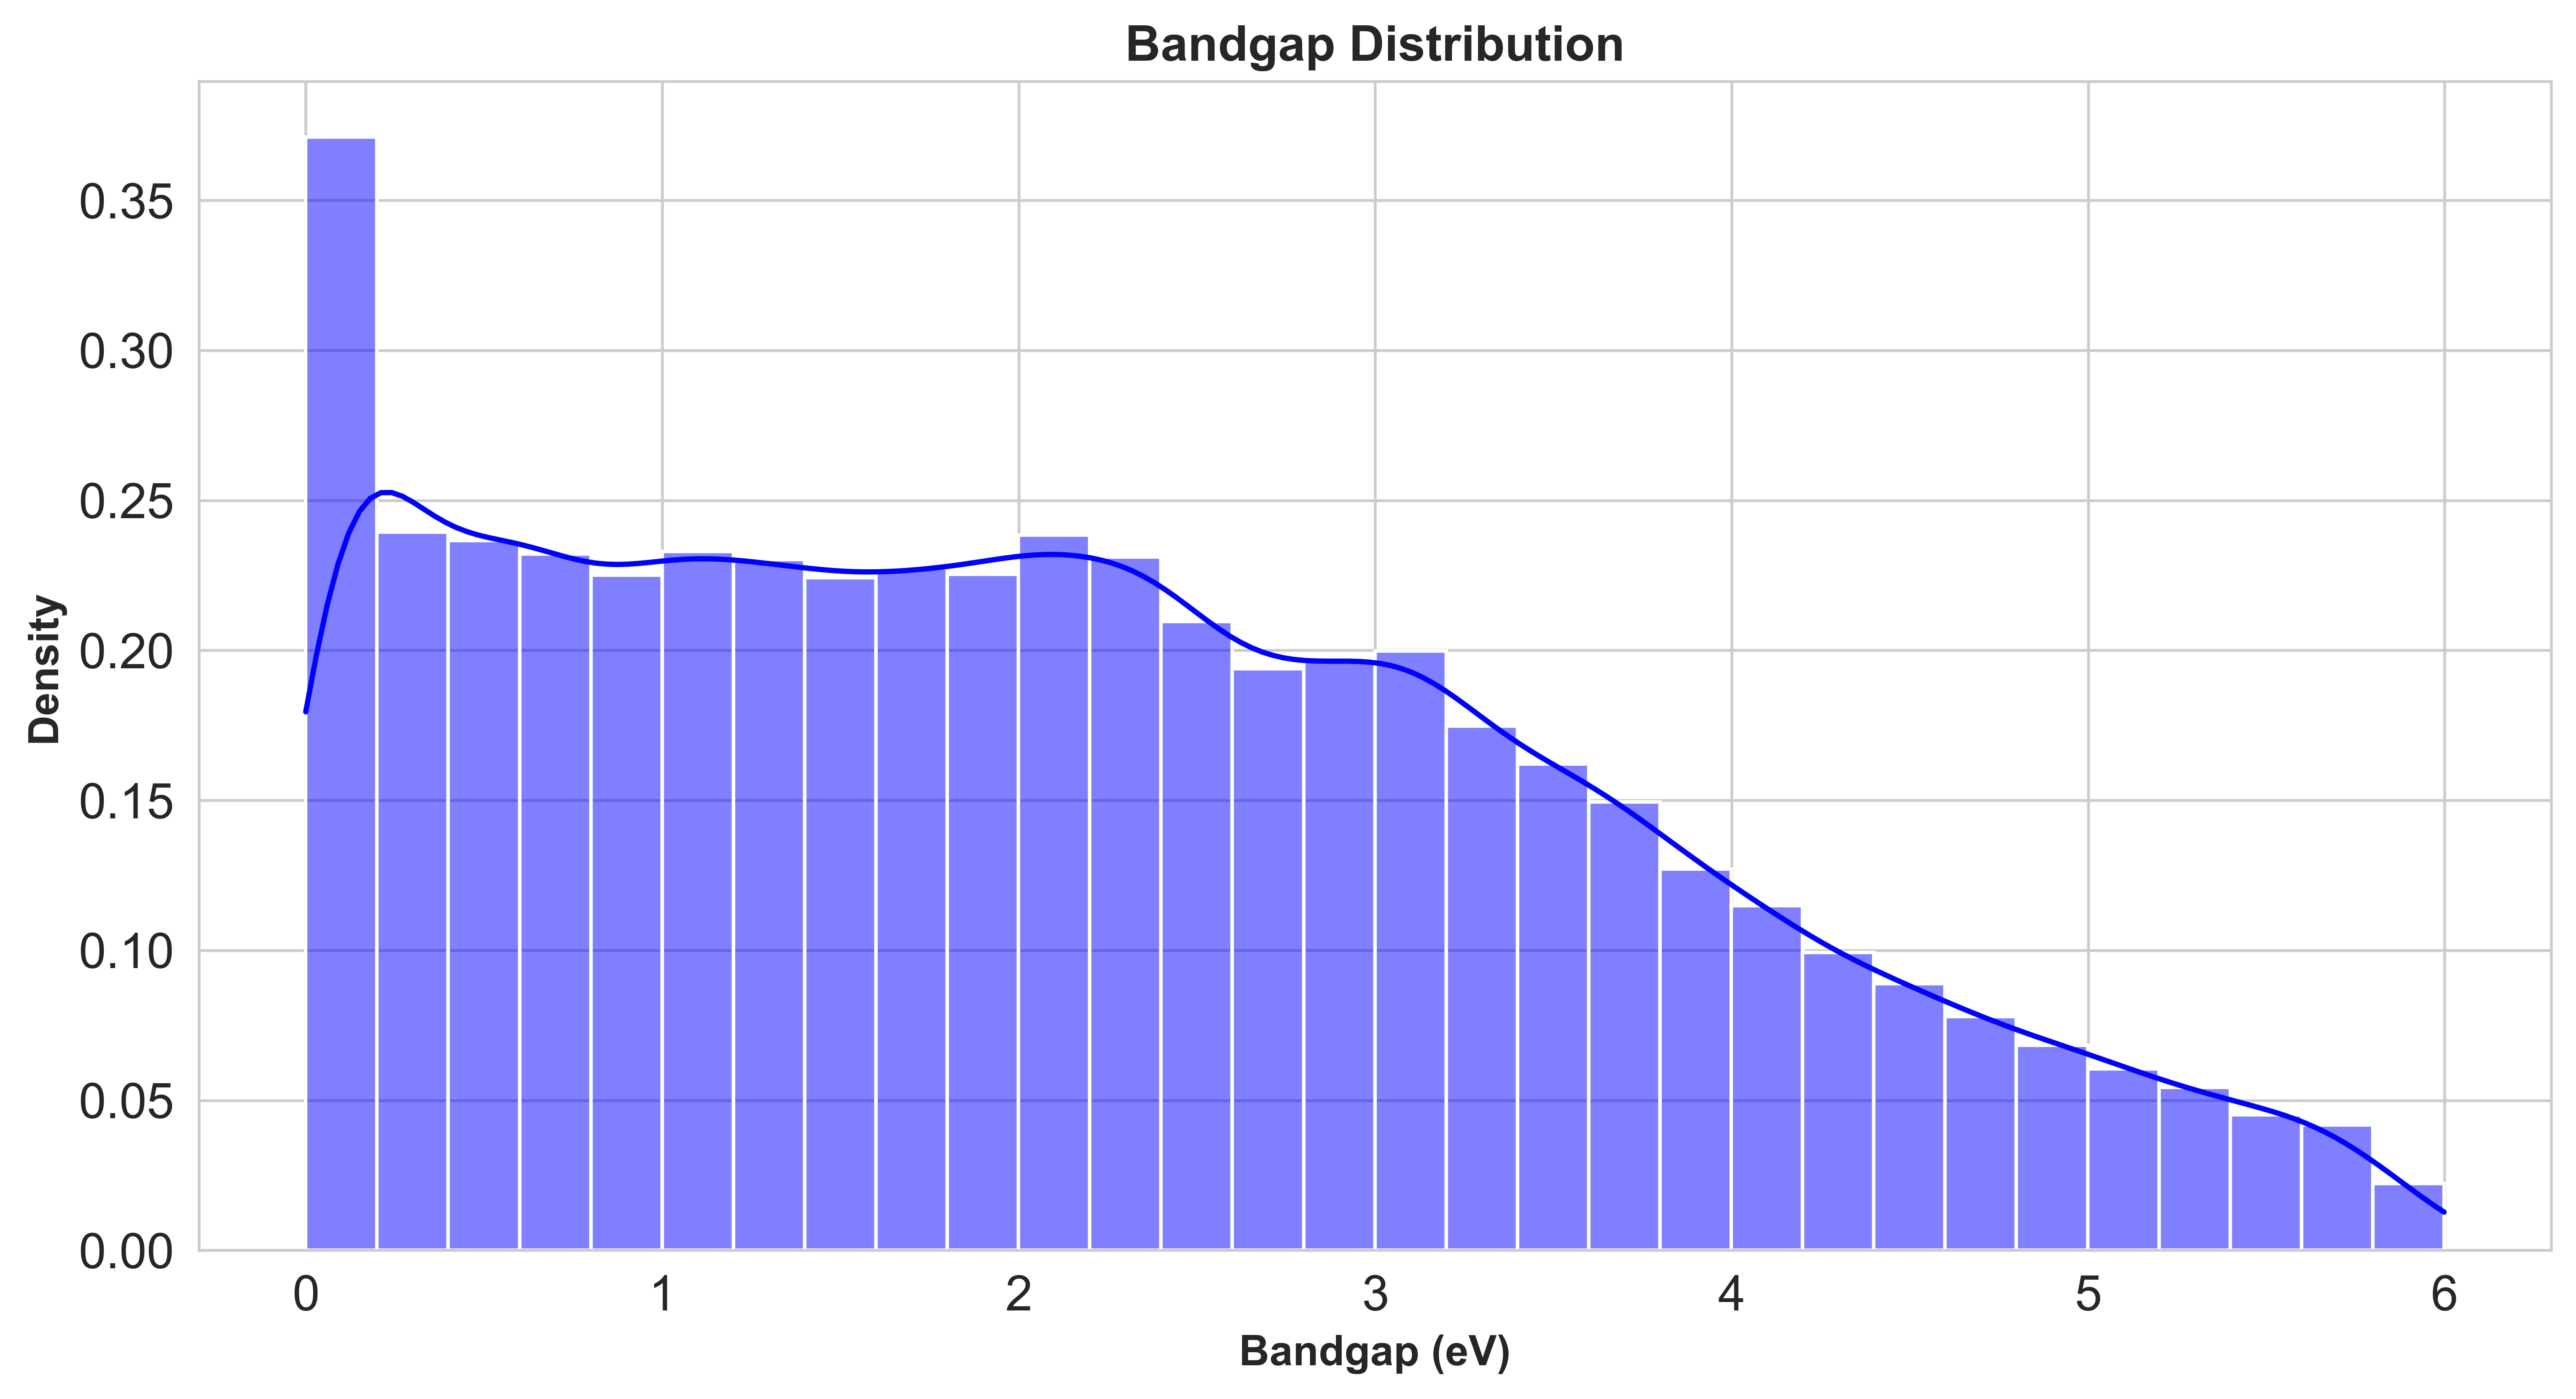

In [16]:
# draw a distribution plot of the bandgap

plt.figure(figsize=(12, 6), dpi=300)
sns.set_style("whitegrid")
sns.set_palette("Set3")  # Set3, RdBu
sns.histplot(data_df['band_gap'], kde=True, bins=30, color='blue', stat='density')
plt.title("Bandgap Distribution", fontsize=14, weight="bold")
plt.xlabel("Bandgap (eV)", fontsize=12, weight="bold")
plt.ylabel("Density", fontsize=12, weight="bold")

# save the figure
plt.savefig(os.path.join(current_dir, './figures/data_distribution/mp/bandgap_distribution.png'), dpi=300)
plt.show()

- We find that the data of bandgap > 4 is obviously decreased.
- This will lead to a decrease in the prediction accuracy of materials with a **wide bandgap**.

### Enumerate the crystal systems as numbers
1. Cubic
2. Tetragonal
3. Hexagonal
4. Orthorhombic
5. Monoclinic
6. Triclinic
7. Trigonal

In [17]:
crystal_system_dict = {
    'Cubic': 0,
    'Tetragonal': 1,
    'Hexagonal': 2,
    'Orthorhombic': 3,
    'Monoclinic': 4,
    'Triclinic': 5,
    'Trigonal': 6
}
data_df['crystal_system'] = data_df['crystal_system'].replace(crystal_system_dict)

C:\Users\Fortyfour\AppData\Local\Temp\ipykernel_8672\132375706.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['crystal_system'] = data_df['crystal_system'].replace(crystal_system_dict)


In [18]:
data_df.head()

,material_id,formula_pretty,composition,nsites,crystal_system,space_group,point_group,volume,density,density_atomic,formation_energy_per_atom,energy_above_hull,is_gap_direct,band_gap
0,mp-11107,Ac2O3,Ac2 O3,5,6,164,-3m,91.511224,9.109130,18.302245,-3.737668,0.0000,False,3.5226
1,mp-32800,Ac2S3,Ac16 S24,40,1,122,-42m,1118.407852,6.535149,27.960196,-2.492486,0.0000,False,2.2962
2,mp-977351,Ac2S3,Ac4 S6,10,6,167,-3m,328.464893,5.562971,32.846489,-2.439787,0.0527,False,3.0275
3,mp-867311,AcAgTe2,Ac1 Ag1 Te2,4,0,225,m-3m,122.518406,7.997421,30.629602,-0.996232,0.0000,False,0.0794
4,mp-1183115,AcAlO3,Ac1 Al1 O3,5,0,221,m-3m,57.451413,8.728230,11.490283,-3.690019,0.0000,True,4.1024


In [19]:
# Enumerate the is_gap_direct: False -> 0, True -> 1
is_gap_direct_dict = {
    False: 0,
    True: 1
}
data_df['is_gap_direct'] = data_df['is_gap_direct'].replace(is_gap_direct_dict)
data_df.head()

C:\Users\Fortyfour\AppData\Local\Temp\ipykernel_8672\1566487779.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_df['is_gap_direct'] = data_df['is_gap_direct'].replace(is_gap_direct_dict)


,material_id,formula_pretty,composition,nsites,crystal_system,space_group,point_group,volume,density,density_atomic,formation_energy_per_atom,energy_above_hull,is_gap_direct,band_gap
0,mp-11107,Ac2O3,Ac2 O3,5,6,164,-3m,91.511224,9.109130,18.302245,-3.737668,0.0000,0,3.5226
1,mp-32800,Ac2S3,Ac16 S24,40,1,122,-42m,1118.407852,6.535149,27.960196,-2.492486,0.0000,0,2.2962
2,mp-977351,Ac2S3,Ac4 S6,10,6,167,-3m,328.464893,5.562971,32.846489,-2.439787,0.0527,0,3.0275
3,mp-867311,AcAgTe2,Ac1 Ag1 Te2,4,0,225,m-3m,122.518406,7.997421,30.629602,-0.996232,0.0000,0,0.0794
4,mp-1183115,AcAlO3,Ac1 Al1 O3,5,0,221,m-3m,57.451413,8.728230,11.490283,-3.690019,0.0000,1,4.1024


In [20]:
# Save the raw data to a csv file
file_path = os.path.join(current_dir, '../Data/mp_eda_data.csv')
data_df.to_csv(file_path, index=False)